<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Игорь! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

Произведем импорт необходимых библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import Ridge, LinearRegression
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

RANDOM_STATE = 42
TEST_SIZE = 0.25

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

In [2]:
df = pd.read_csv('/datasets/taxi.csv',index_col = ['datetime'], parse_dates=['datetime'])

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что время сразу в индексе!</font>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
df.head(1)

,num_orders
datetime,
2018-03-01,9


In [5]:
df.tail(1)

,num_orders
datetime,
2018-08-31 23:50:00,53


Датасет содержит 26496 строк  с информацией о дате и времени заказа, а также о количестве заказов такси. Данные не содержат пропуски. Данные представленны за период с марта по август 2018 года.

Проверим в хронологическом ли порядке расположены даты заказов:

In [6]:
df.index.is_monotonic

True

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Даты расположены в хронологическом порядке

С учетом горизонта прогнозирования в 1 час проведем ресемплирование данных:

In [7]:
df = df.resample('1H').sum()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Ресемплирование по часу выполнено верно. Супер, что значения просуммированы, это проще интерпретируется, чем использование других агрегационных функций.</font>

In [8]:
df.head(3)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71


В результате подготовки данных мы получили датасет с количеством заказов такси по часам и датам, расположенным в хронологическом порядке. 

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

## Анализ

Для анализа временного ряда построим графичиские зависимости, а также посмотрим на статстическое описание данных. 

In [9]:
df.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


In [10]:
df.index[df.max()].tolist()

[Timestamp('2018-03-20 06:00:00')]

В среднем за весь период наблюдения было около 84 заказов такси в час. Максимальное количество заказов 462 было зафиксировано 2018-03-20 в 06:00.  

Проанализируем количество заказов такси на различных временных интервалах.

In [11]:
def time_plot(df,interval):
    try:
        plt.figure(figsize=(15, 3))
        plt.plot(df.resample(interval).mean());
        plt.title(f'Среднее Количество заказов такси в интервле {interval}')
        plt.xlabel('Дата')
        plt.ylabel('Количество заказов')
        plt.show()
    except:
        print('Не удалось построить графическую зависимость')

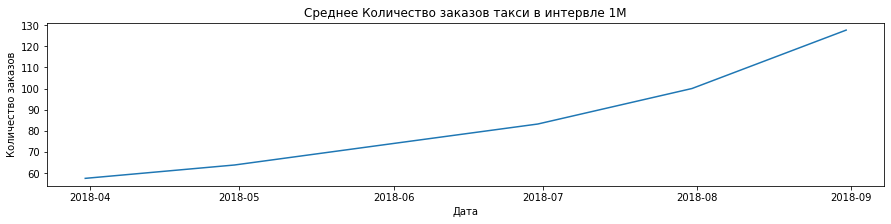

In [12]:
time_plot(df,'1M')

Среднее количество заказов такси посстоянно росло на всем иннтервале наблюдения. Максимальное среднее количество заказов около 130 в месяц. Посмотрим на недельном интервале:

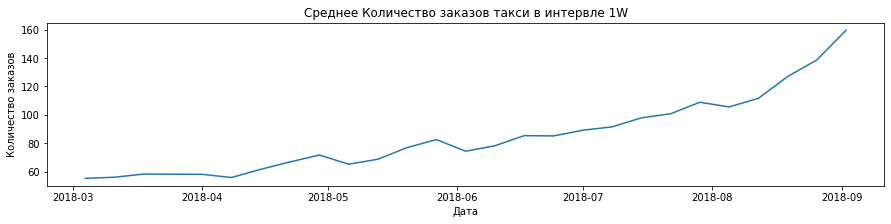

In [13]:
time_plot(df,'1W')

С интервалом в 1 неделю стали заменты колебания количества заказов такси

Посмотрим на количество заказов в интервале 12 часов:

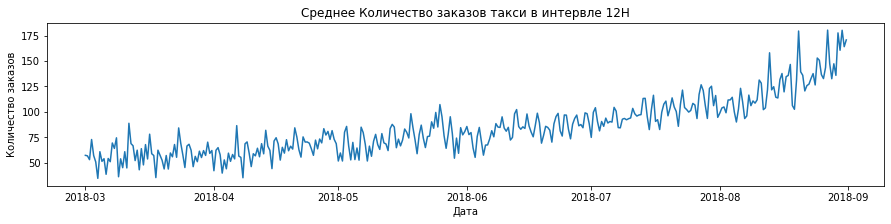

In [14]:
time_plot(df,'12H')

Колебания стали еще больше, видны повторяющиеся циклы - пики и спады спроса. Посмотрим как мееняется график на интервале 1 час за несколько дней в одном из месяцев:

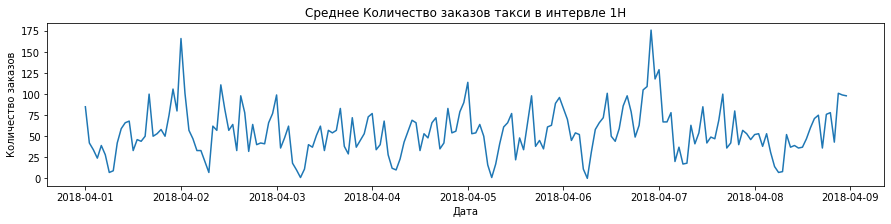

In [15]:
time_plot(df['2018-04-01':'2018-04-08'],'1H')

Наблюдаются пики спроса в около 00:00 часов и заметные спады в ночное время. 

Выделим из временного ряда тренд, сезонность и шум. Построим графики этих параметров на разных интервалах времени.

In [16]:
def decomposed(df):
    try:
        decomposed = seasonal_decompose(df)
        plt.figure(figsize=(15, 10))
        plt.subplot(311)
        decomposed.trend.plot(ax=plt.gca())
        plt.title('Тренд')
        plt.subplot(312)
        decomposed.seasonal.plot(ax=plt.gca())
        plt.title('Сезонность')
        plt.subplot(313)
        decomposed.resid.plot(ax=plt.gca())
        plt.title('Остатки')
        plt.tight_layout()
    except: print('Не удалось построить графики')


Посмотрим на итнервал в один месяц:

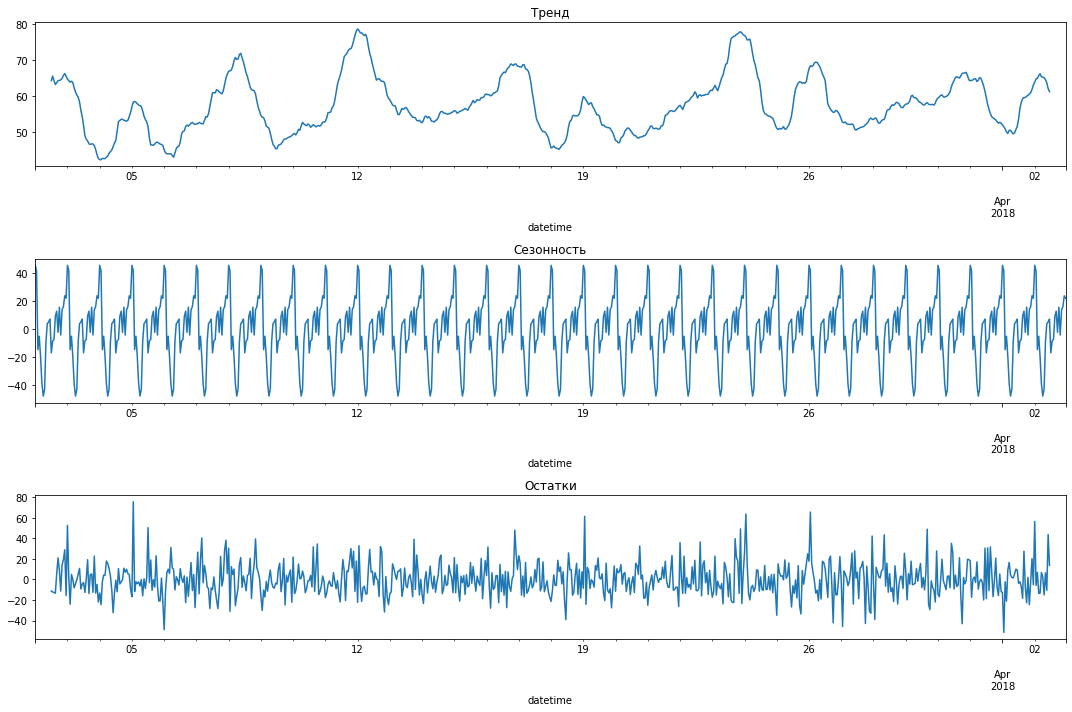

In [17]:
decomposed(df['2018-03-02':'2018-04-02'])

Здесь также наблюдается циклический рост и спад спроса, который достигает пика около 00:00 и спада в ночное время до 12:00. Посмотрим на интервал в полгода

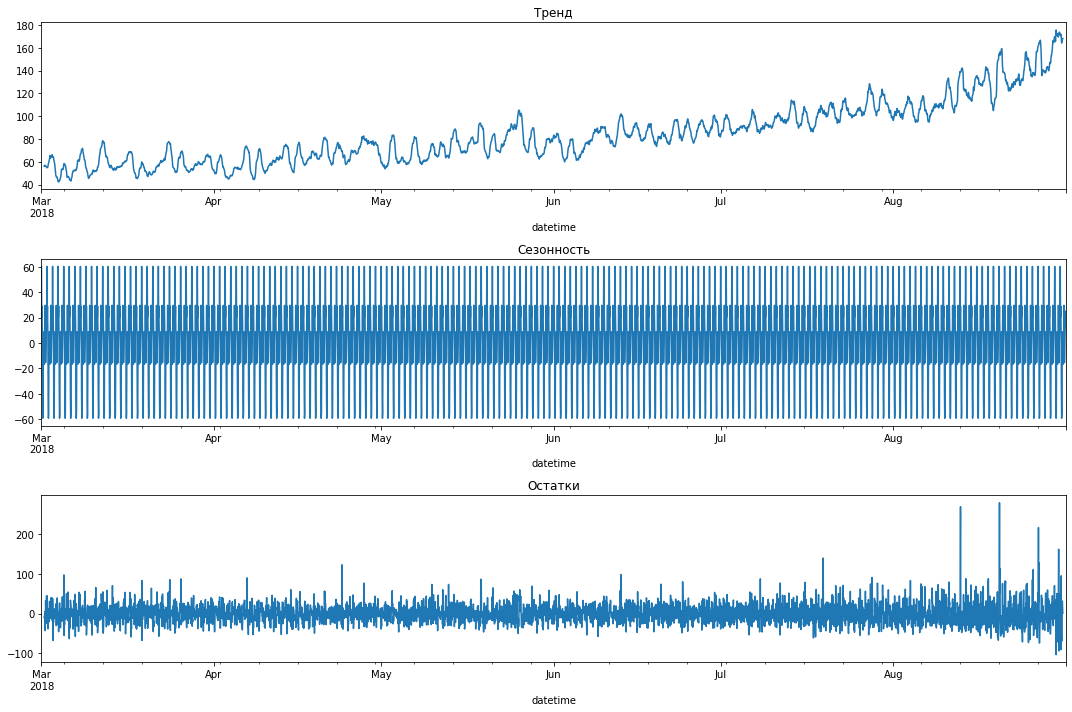

In [18]:
decomposed(df)

Наблюдается практически одинаковая шумовая составляющая на всем протяжении измерений. Также виден растущий тренд - умеренный рост количества заказов летом и более заметный рост осенью, при в весенние месяцы количество заказов практически не растет.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что компоненты рассмотренны на различных временных интервалах.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Если ресемлировать ряд по дню и вывести интервал около месяца, то можно увидеть сезонность внутри недели.</font>

Создадим дополнительные признаки с днем недели и часом

In [19]:
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s>На мой взгляд: не все признаки подходят, чисто логически. Выскажу свою позицию:<br>

<font color='red'>1) Признак месяц: НЕТ, не подходит, у нас в истории всего один март, май... И данных меньше чем за год. Да и горизонт прогноза - часы. Поэтому сезонность времени года будет просто в тренде уже заложена.</font><br>
<font color='darkorange'>2) Признак день: НЕТ, также не подходит, у нас нет сезонности внутри месяца, будет просто последовательность чисел.</s><br></font>
<font color='green'>3) Признак день недели: ДА, т.к. у нас есть недельная сезонность.<br>
4) Признак час: ДА, т.к. есть часовая (суточная) сезонность.<br>

<font color='blue'>Как ты думаешь?</font>

<font color='purple'><b>Комментарий студента</b></font> Согласен, в таком контексе действительно лучше выделить день недели и час

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Супер! Убрали лишний шум из модели!</font>

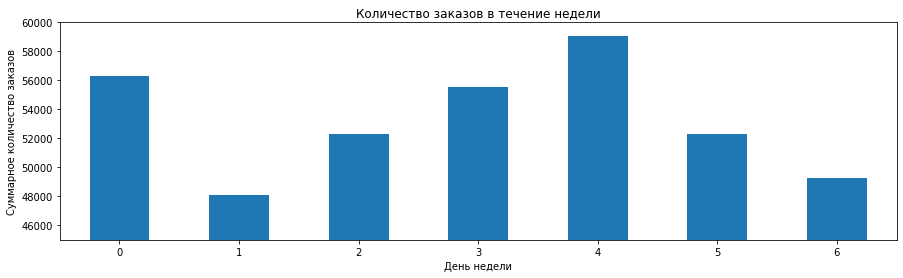

In [20]:
plt.figure(figsize=(15, 4))
df.groupby('dayofweek')['num_orders'].sum().plot(kind = 'bar', rot=0);
plt.ylim(45000,60000)
plt.title('Количество заказов в течение недели')
plt.xlabel('День недели')
plt.ylabel('Cуммарное количество заказов');

**Промежуточные выводы**

На основании проведенного анализа можно сделать ряд выводов:
- Среднее количество заказов такси  росло на всем иннтервале наблюдения, весенние месяцы рост минимален, летом более заметен, а ближе к осени максимален. Максимальное среднее количество заказов около 130 в месяц.
- Наблюдаются пики спроса около 00:00 часов и заметные спады в ночное время.
- Спрос на такси растет в течение недели и достигает пика в пятницу, затем убывает. Также заметен пик заказов в понедельник

## Обучение

Выполним подготвку данных для обучения модели:

- Добавим новые признаки 
- разбьем данные на обучающую и тестовыую выборки в соотношении 90:10

Добавим "отстающие значения" и "Скользящее среднее"  

In [21]:
def make_features(data, max_lag, rolling_mean_size):
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)        
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>
5) Признак lag: ДА, это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.<br>
6) Признак rolling: ДА, это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда.</font> <br>
</font>

In [22]:
make_features(df,24,5)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Классно, что сдвиг выбран с учётом сезонности в сутках, кратными 24 👍</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Можно, так же, посмотреть Автокорреляцию и оставить только значимые Лаги. Чем меньше признаков - тем модели проще расчитать прогноз. [Автокоррелеляция](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)</font>

<font color='purple'><b>Комментарий студента</b></font> Построил график. Я правильно понимаю, что наиболее коррелирющие лаги 1,2,3 и 22,23,24? Остальные тоже выходят за синюю область, значит их стоит оставить? Можешь подсказать как правильно интерпретировать результат?

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Можно оставить самые значимые, например 1 и 24, чтобы не "раздувать" размерность входных данных моделей.</font>

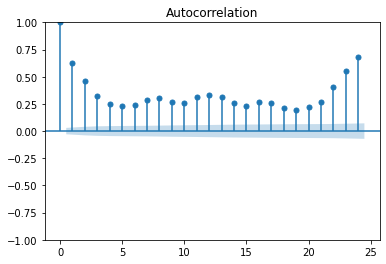

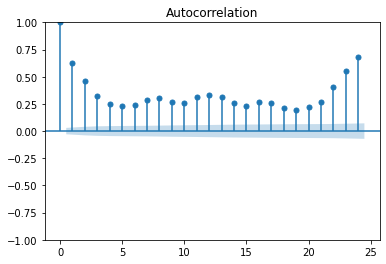

In [23]:
sm.graphics.tsa.plot_acf(df['num_orders'], lags=24)

Разбьем данные на обучающую и тестовую

In [24]:
train, test = train_test_split(df, shuffle=False, test_size = 0.1)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что запрещаешь перемешивание отчётов.</font>

In [25]:
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-01 00:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Выборки идут в нужной последовательности.</font>

Разделение выполнено корректно.

Избавимся от пустых значений новых признаков:

In [26]:
train = train.dropna()

Разобьем данные на входные и целевые

In [27]:
X_train = train.drop('num_orders', axis=1)
y_train = train['num_orders']

X_test = test.drop('num_orders', axis=1)
y_test = test['num_orders']

Проведем обучение на нескольких моделях. В качестве моделей будем использовать модель линейной регрессии, линейную регрессию с регуляризацией и две модели градиентного бустинга. Начнем с модели линейной регрессии с регуляризацией. Подбирать гиперпараметры будем с использованием RandomizeSearchCV

In [28]:
pipe_final = Pipeline([
    ('models', LinearRegression())
])

Для корректной кросс-валидации используем TimeSeriesSplit

In [29]:
time_split = TimeSeriesSplit(n_splits=10)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что применяешь TimeSeriesSplit для кроссвалидации временных рядов.</font>

In [30]:
param_distributions = [
    {
        'models': [LinearRegression()]
    },
    {
        'models': [Ridge()],
        'models__alpha' : [0.1,1,10]
    },     
    {
        'models': [LGBMRegressor(random_state=RANDOM_STATE)],
        'models__n_estimators': [100,300,500],
        'models__max_depth': [1,5,10]
    },
     {
        'models': [CatBoostRegressor(random_state=RANDOM_STATE)],
    }
] 

In [31]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions, 
    cv=time_split,
    scoring='neg_root_mean_squared_error',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [32]:
randomized_search.fit(X_train, y_train);

Learning rate set to 0.03484
0:	learn: 28.9355395	total: 49.8ms	remaining: 49.7s
1:	learn: 28.5002045	total: 52.3ms	remaining: 26.1s
2:	learn: 28.1308713	total: 54.7ms	remaining: 18.2s
3:	learn: 27.7488635	total: 57.1ms	remaining: 14.2s
4:	learn: 27.3527516	total: 59.4ms	remaining: 11.8s
5:	learn: 26.9570315	total: 61.8ms	remaining: 10.2s
6:	learn: 26.6136754	total: 64.3ms	remaining: 9.12s
7:	learn: 26.2882648	total: 66.5ms	remaining: 8.25s
8:	learn: 25.9717920	total: 68.9ms	remaining: 7.59s
9:	learn: 25.6214937	total: 71.3ms	remaining: 7.06s
10:	learn: 25.2743653	total: 73.8ms	remaining: 6.63s
11:	learn: 25.0218366	total: 76.1ms	remaining: 6.26s
12:	learn: 24.7225581	total: 78.6ms	remaining: 5.97s
13:	learn: 24.4187511	total: 80.9ms	remaining: 5.7s
14:	learn: 24.1407857	total: 83ms	remaining: 5.45s
15:	learn: 23.8650994	total: 85.2ms	remaining: 5.24s
16:	learn: 23.6072445	total: 87.4ms	remaining: 5.05s
17:	learn: 23.3674903	total: 89.6ms	remaining: 4.89s
18:	learn: 23.1235605	total: 9

In [33]:
#Фиксируем модель
best_model = randomized_search.best_estimator_

#Выводим резульатаы модели
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', abs(randomized_search.best_score_))

Лучшая модель и её параметры:

 Pipeline(steps=[('models',
                 <catboost.core.CatBoostRegressor object at 0x7f2577a3a9d0>)])
Метрика лучшей модели на кросс-валидации: 23.208175904021026


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> 👍</font>

Составим сводную таблицу с результатами моделей:

In [34]:
best_result = pd.DataFrame(randomized_search.cv_results_)[
    ['param_models','mean_test_score','mean_fit_time','rank_test_score']].sort_values(by='rank_test_score')
best_result

,param_models,mean_test_score,mean_fit_time,rank_test_score
8,<catboost.core.CatBoostRegressor object at 0x7...,-23.208176,4.240462,1
5,LGBMRegressor(random_state=42),-23.943282,1.596613,2
0,LGBMRegressor(random_state=42),-24.039859,3.303534,3
1,LGBMRegressor(random_state=42),-24.225714,2.977609,4
3,LGBMRegressor(random_state=42),-24.277193,5.524440,5
4,LGBMRegressor(random_state=42),-25.424876,0.330762,6
9,LGBMRegressor(random_state=42),-26.413722,0.128220,7
7,Ridge(),-26.427942,0.047589,8
6,Ridge(),-26.427942,0.021420,9
2,LinearRegression(),-26.432407,0.039742,10


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично, что есть табличка результатов для сравнения.</font>

Лучший результат показала модель CatBoostRegressor со стандартными гиперпараметрами. При этом среднее время обучения также близко к максимальному, но т.к. в соответствии с условиями требования к времени обучения не предъявляются остваим в качестве модели для тестирования эту модель 

## Тестирование

Проведем тестирование модели с лучшим результатом - CatBoostRegressor.

In [35]:
predict = best_model.predict(X_test)
print(f'Метрика RMSE на тестовой выборке: {mean_squared_error(y_test, predict, squared=False)}')

Метрика RMSE на тестовой выборке: 40.27133257925587


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

Целевое значение метрики достигнуто - RMSE < 48. Проверим модель на адекватность, сравнив результат с константной моделью:

In [36]:
dummy_model = DummyRegressor()
dummy_model.fit(X_train, y_train)
dummy_model_predict = dummy_model.predict(X_test)

# оценка качества модели по метрике RMSE
dummy_smape = mean_squared_error(y_test, dummy_model_predict,squared=False)
print('Dummy Model RMSE =', round(dummy_smape, 2)) 

Dummy Model RMSE = 84.65


Если использовать в качестве константной модели подстановку предыдущего значения:

In [37]:
pred_previous = y_test.shift()
pred_previous.iloc[0] = y_train.iloc[-1]

print("RMSE =", mean_squared_error(y_test, pred_previous,squared=False))

RMSE = 58.856486242815066


<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Во временных рядах, в качестве простой модели, обычно смотрят подстановку предыдущего значения. (lag_1) </font>

<font color='purple'><b>Комментарий студента:</b></font>  Добавил такую реализацию

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> 👍</font>

Модель прошла проверку на адекватность, константная модель показывает результат заметно хуже.

Модель можно использовать для предсказания спроса на такси. Тажке присутствует возможность дополнительно улучшить метрику настроив модель. 

## Вывод

От заказчика были получены данные, содержащие информацию о количестве заказов такси в аэропорту. Историческе данные содержали наблюдения в период с "2018-03-01 00:00:00" по "2018-08-31 23:50:00". В результате подготовки данных был получен датасет с количеством заказов такси по часам и датам, расположенным в хронологическом порядке.

Далее был проведен анализ данных. В среднем за весь период наблюдения было около 84 заказов такси в час. Среднее количество заказов такси росло на всем иннтервале наблюдения. В весенние месяцы рост едва заметен, а в летние уже сильный. Пик роста пришелся на финал наблюдений. Также было обнаружено циклическое поведение спроса: наблюдаются пики спроса около 00:00 часов и заметные спады в ночное время. А если рассматривать спрос в течении недели, то заметно, что спрос на такси растет в течение недели и достигает пика в пятницу, затем убывает. Также пристутствует пик количества заказов понедельник. 

На следующем этапе работы проходило обучение и оценка моделей для предсказания спроса. В качестве моделей были выбраны регрессионные модели - LinearRegression, Ridge, LGBMRegressor, CatBoostRegressor. Поиск лучшей модели с гиперпараметрами проводился с использованием RandomizedSearchCV. Результаты подбора показали, что лучшим значением целевой метрики обладает модель - CatBoostRegressor с гиперпараметрами по умолчанию. Резултат модели на тестовых данных показал значение целевой метрики RMSE = 40.37, что удовлетворяет требованиям заказчика. 

Таким образом компания «Чётенькое такси» может использовать подготовленную модель, чтобы спрогнозировать количество заказов такси на следующий час.


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Игорь, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Не используй признак "месяц" на данных меньше года.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Игорь, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='green'>Дополнительные материалы:\
Е.Рябенко - Прогнозирование временных рядов https://www.youtube.com/watch?v=u433nrxdf5k \
Б.Б. Демешев - временные ряды https://disk.yandex.ru/i/LiDHB-B3A6Lz5A \
Канторович - Анализ временных рядов https://yadi.sk/i/IOkUOS3hTXf3gg \

Базовое применение ARIMA - https://colab.research.google.com/drive/17RnG91Eq8JBKyxToNzvCvjibfxum-oPj?usp=sharing \
Prophet модель от известной компании https://facebook.github.io/prophet/ \
https://facebook.github.io/prophet/docs/quick_start.html#python-api \
https://nbviewer.jupyter.org/github/miptgirl/habra_materials/blob/master/prophet/habra_data.ipynb \
Или [Предсказываем будущее с помощью библиотеки Facebook Prophet](https://habr.com/ru/company/ods/blog/323730/)
</font>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48